In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:21<00:00, 52.6MB/s]
100% 4.09G/4.09G [01:21<00:00, 53.8MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [ ]:
!unzip -q ChinaSet_AllFiles.zip -d chinaset

unzip:  cannot find or open ChinaSet_AllFiles.zip, ChinaSet_AllFiles.zip.zip or ChinaSet_AllFiles.zip.ZIP.


In [ ]:
!unzip -q Montgomery.zip -d montset

unzip:  cannot find or open Montgomery.zip, Montgomery.zip.zip or Montgomery.zip.ZIP.


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:

root_dir = "/content/drive/My Drive/Hack In India/"
base_dir = root_dir + 'fastai-v3/'

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 48

In [ ]:
path = Path("/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/")

In [ ]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0439_1.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0618_1.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0546_1.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0569_1.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0073_0.png')]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def get_labels(file_path): return 'Normal' if '_0.png' in str(file_path) else 'Abnormal'
data = ImageDataBunch.from_name_func(path, fnames, label_func=get_labels, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

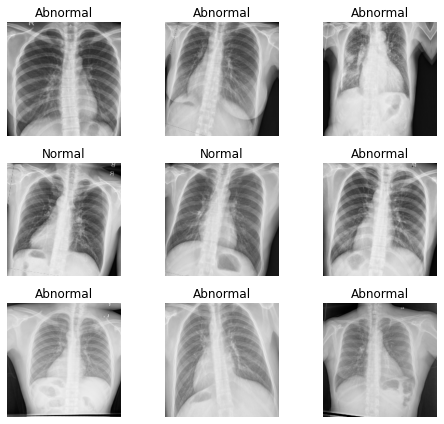

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
data.c,len(data.train_ds), len(data.valid_ds)

(2, 530, 132)

In [ ]:
!pip install efficientnet-pytorch

In [ ]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b3')
model._fc = nn.Linear(1536, data.c)
learn = Learner(data, model, metrics=accuracy)

Loaded pretrained weights for efficientnet-b3


In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.580502,0.327040,0.871212,02:01


In [ ]:
learn.export(file="/content/model.pkl")

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

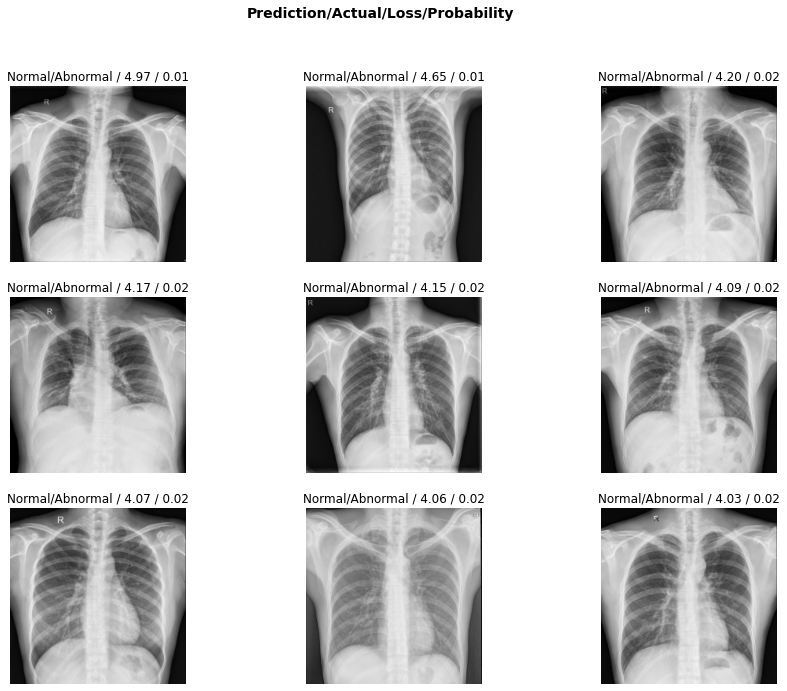

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

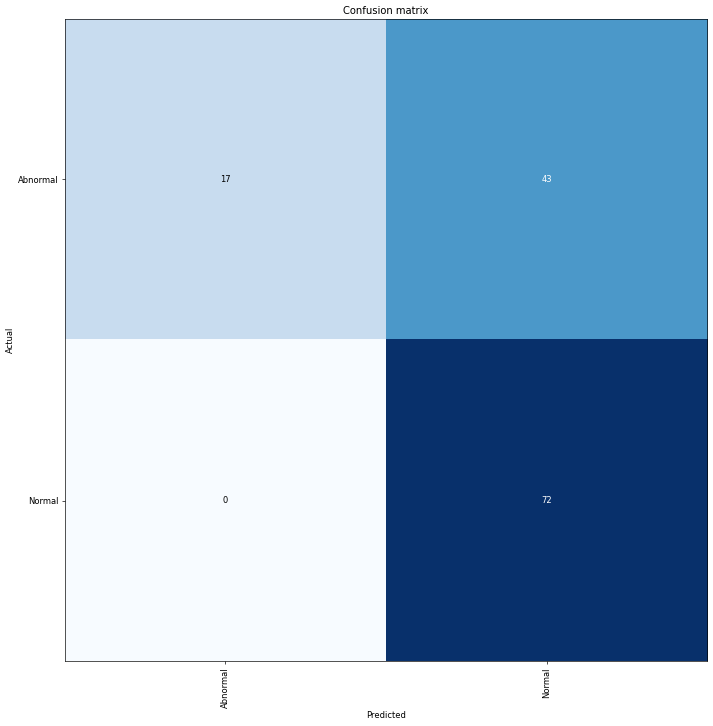

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


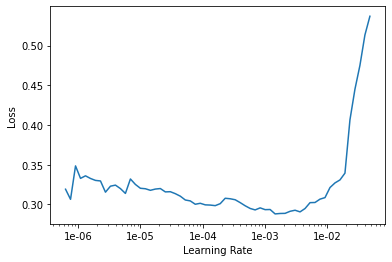

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.300678,8.279480,0.515152,02:00


KeyboardInterrupt: ignored

In [ ]:
learn.save('stage-2', return_path=True)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10,1e-5)

In [ ]:
learn.save('final-stage-effb3', return_path=True)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

In [ ]:
learn.export(file="model.pkl")

In [ ]:
path=learn.path
print(path)